### Deteksi Garis Tepi

In [1]:
import cv2  # Mengimpor pustaka OpenCV untuk visi komputer
import numpy as np  # Mengimpor pustaka NumPy untuk operasi numerik
import matplotlib.pyplot as plt  # Mengimpor pustaka Matplotlib untuk plotting
%matplotlib inline   
import skimage  # Mengimpor pustaka scikit-image untuk pemrosesan gambar


In [2]:
import cv2

# Membaca gambar dari file '1.jpg' dan menyimpannya ke dalam variabel 'image'
image = cv2.imread('1.jpg')

# Menampilkan gambar dalam sebuah jendela dengan judul "Gambar Parkir"
cv2.imshow("Gambar Parkir", image)

# Menunggu hingga pengguna menekan tombol pada keyboard
cv2.waitKey(0)

# Menutup semua jendela yang terbuka setelah pengguna menekan tombol
cv2.destroyAllWindows()


In [3]:
# Mengubah gambar ke dalam format skala abu-abu
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Mendeteksi tepi (edges) dalam gambar menggunakan metode Canny
# dengan thresholding lower dan upper thresholds 100 dan 150
edges = cv2.Canny(image, 100, 150)


In [4]:
# Menampilkan gambar hasil deteksi tepi dalam jendela dengan judul "Gambar Parkir"
cv2.imshow("Gambar Parkir", edges)

# Menunggu hingga pengguna menekan tombol pada keyboard
cv2.waitKey(0)

# Menutup semua jendela yang terbuka setelah pengguna menekan tombol
cv2.destroyAllWindows()


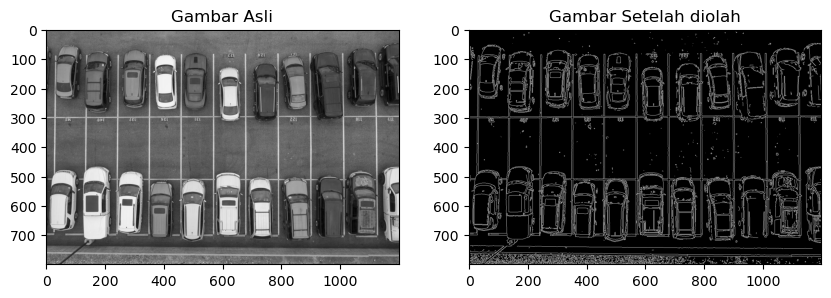

In [5]:
# Membuat subplot dengan 1 baris dan 2 kolom, ukuran figur 10x10 inci
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# Membuat array yang meratakan sumbu dari subplot
ax = axs.ravel()

# Menampilkan gambar skala abu-abu di subplot pertama (ax[0])
ax[0].imshow(gray, cmap="gray")
ax[0].set_title("Gambar Asli")  # Menetapkan judul subplot pertama

# Menampilkan gambar hasil deteksi tepi di subplot kedua (ax[1])
ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Gambar Setelah diolah")  # Menetapkan judul subplot kedua

# Menampilkan plot
plt.show()


In [6]:
# Melakukan transformasi Hough pada gambar tepi 'edges'
# dengan resolusi 1 pixel, 1 derajat untuk sudut theta, dan threshold 30
# serta maksimum jarak gap antara garis 20 pixel
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=20)

# Membuat salinan dari gambar asli untuk menggambar garis-garis hasil deteksi Hough
image_line = image.copy()


In [7]:
# Menggambar garis-garis yang terdeteksi menggunakan transformasi Hough
for line in lines:
    # Mengambil koordinat titik ujung garis dari array 'line'
    x1, y1, x2, y2 = line[0]
    
    # Menggambar garis dari titik (x1, y1) ke (x2, y2) pada gambar 'image_line'
    # Warna garis yang digunakan adalah (100, 8, 255) dalam format BGR (Blue-Green-Red)
    # Ketebalan garis yang digunakan adalah 1 piksel
    cv2.line(image_line, (x1, y1), (x2, y2), (100, 8, 255), 1)


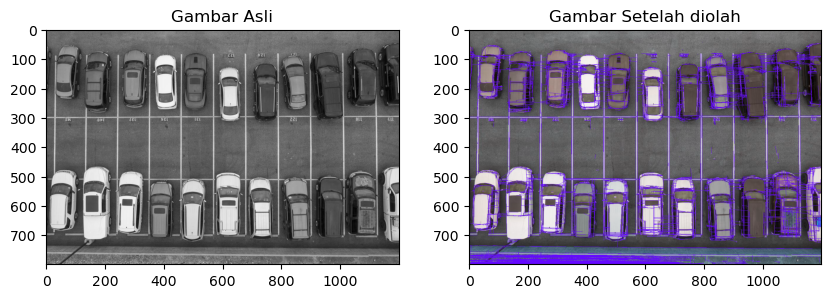

In [8]:
# Membuat subplot dengan 1 baris dan 2 kolom, ukuran figur 10x10 inci
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# Meratakan sumbu dari subplot ke dalam array ax
ax = axs.ravel()

# Menampilkan gambar skala abu-abu (gray) di subplot pertama (ax[0])
ax[0].imshow(gray, cmap="gray")
ax[0].set_title("Gambar Asli")  # Menetapkan judul subplot pertama

# Menampilkan gambar hasil deteksi tepi (image_line) di subplot kedua (ax[1])
ax[1].imshow(image_line, cmap="gray")
ax[1].set_title("Gambar Setelah diolah")  # Menetapkan judul subplot kedua

# Menampilkan plot dengan kedua gambar yang telah ditampilkan
plt.show()


In [9]:
edges

array([[  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0,   0, 255],
       ...,
       [  0, 255, 255, ...,   0, 255, 255],
       [255,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255,   0,   0]], dtype=uint8)

In [10]:
lines

array([[[ 567,  704,  567,   84]],

       [[1152,  767, 1199,  767]],

       [[   0,  298,  300,  298]],

       ...,

       [[ 429,   97,  430,   97]],

       [[ 145,   86,  151,   86]],

       [[ 980,  144, 1041,  145]]], dtype=int32)